<a href="https://colab.research.google.com/github/IgorEisenlohr/Kaggle-Stroke-Prediction/blob/main/Playgorund_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Kaggle/Playground Season 4 EP 2/playground-series-s3e2.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Kaggle/Playground Season 4 EP 2/')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Playground Season 4 EP 2/train.csv', index_col = 'id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
df.shape

(15304, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


# Separando os dados em treino e validação

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_validate = train_test_split(df, train_size=0.85, random_state=0)

print(df_train.shape, df_validate.shape)

(13008, 11) (2296, 11)


# Analisando os dados de treino para pre processamento

In [ ]:
df_train.stroke.value_counts()

0    12459
1      549
Name: stroke, dtype: int64

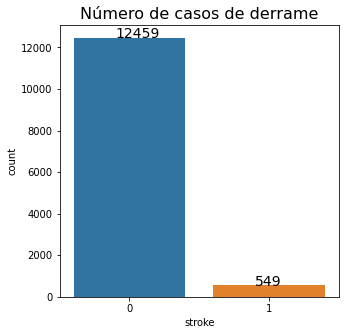

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Número de casos de derrame', fontsize=16)
ax = sns.countplot(x=df_train.stroke)
for p in ax.patches:
  plt.annotate(p.get_height(), xy=(p.get_x()+0.3, p.get_height()), fontsize=14)

necessidade de balancear os dados

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

In [ ]:
obj_col = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
num_col = ['age','avg_glucose_level', 'bmi']

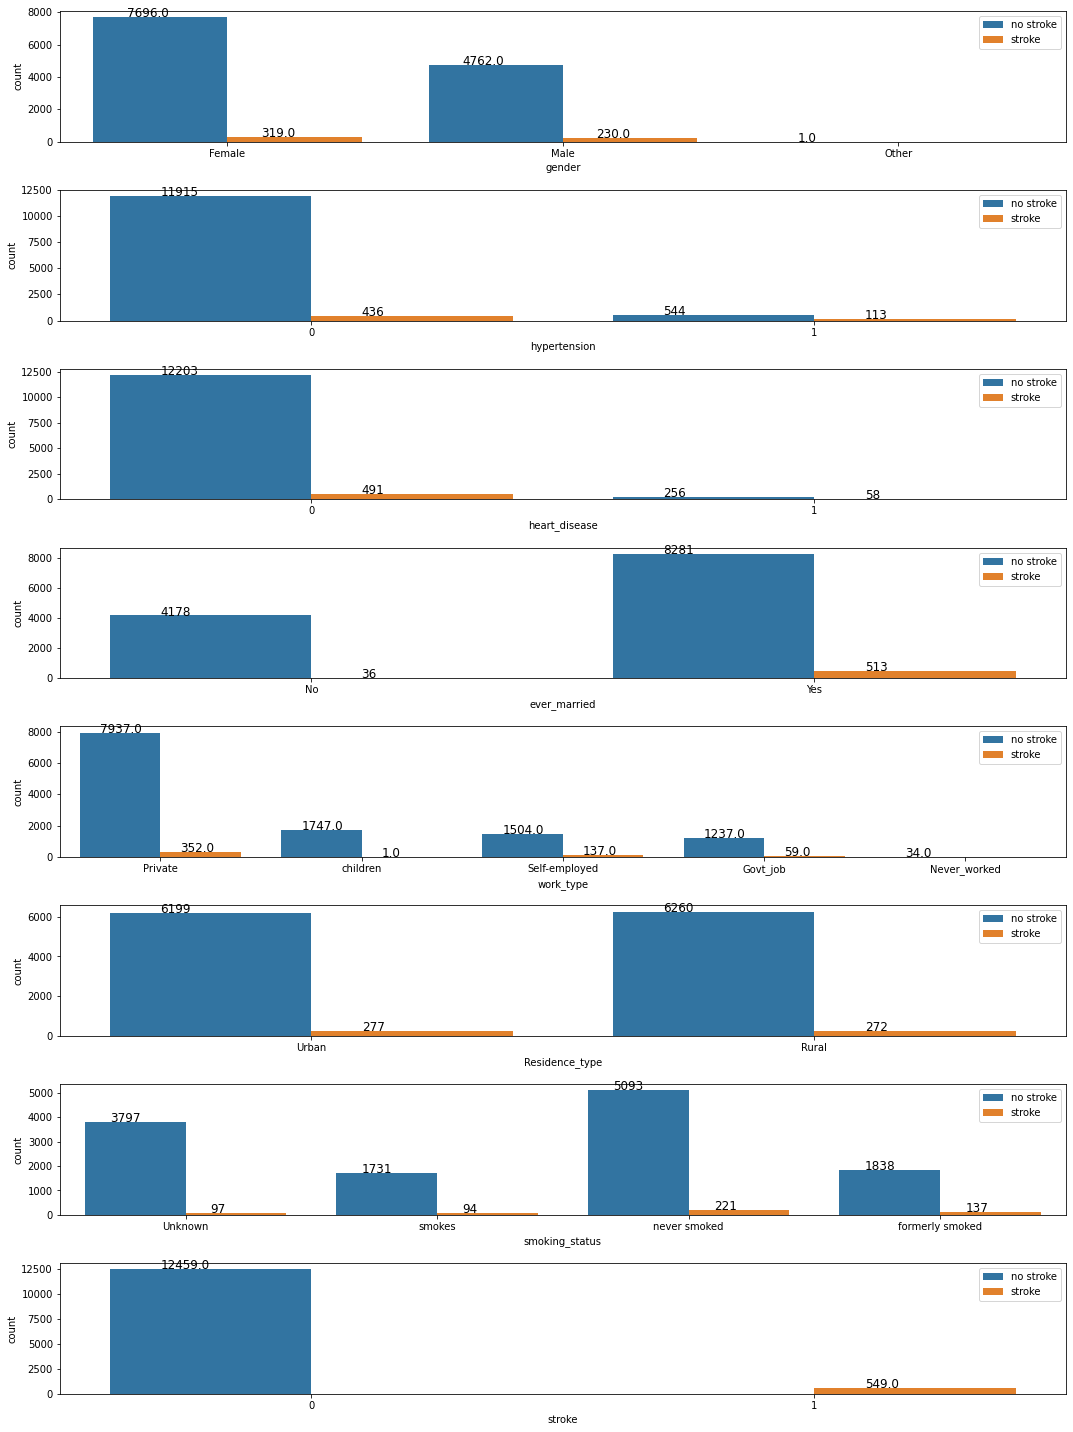

In [ ]:
plt.figure(figsize=(15,20))
for n, col in enumerate(df_train[obj_col], start=1):
  plt.subplot(len(obj_col), 1, n)
  ax = sns.countplot(x=df_train[col], hue=df_train.stroke)
  plt.legend(labels=['no stroke', 'stroke'] ,loc='upper right')
  for p in ax.patches:
    plt.annotate(p.get_height(), xy=(p.get_x()+0.1, p.get_height()), fontsize=12)

plt.tight_layout()

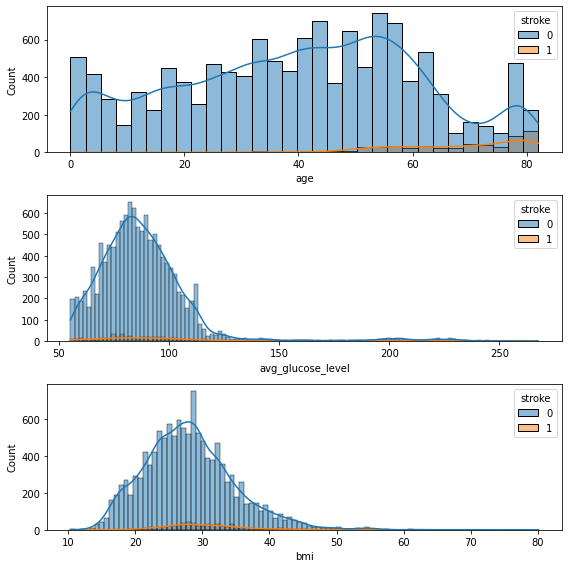

In [ ]:
plt.figure(figsize=(8,8))
for n, col in enumerate(df_train[num_col], start=1):
  plt.subplot(len(num_col), 1, n)
  sns.histplot(x=df_train[col], kde=True, hue=df_train.stroke)

plt.tight_layout()

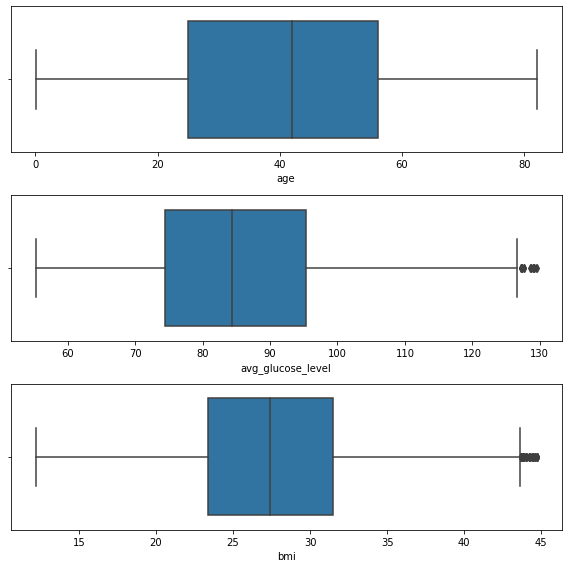

In [ ]:
plt.figure(figsize=(8,8))
for n, col in enumerate(df_train[num_col], start=1):
  plt.subplot(len(num_col), 1, n)
  sns.boxplot(x=df_train[col])

plt.tight_layout()

# Outliers

In [ ]:
def remove_outliers(data, col):
  Q1  = np.quantile(data[col], 0.25)
  Q3  = np.quantile(data[col], 0.75)
  IQR = Q3-Q1

  print(f'IQR for {col} is {IQR}')
  lower_range = Q1 - 1.5*IQR
  upper_range = Q3 + 1.5*IQR

  outlier_free_list = []
  for x in data[col]:
    if x>lower_range and x<upper_range:
      outlier_free_list.append(x)

  filtered_df = data.loc[data[col].isin(outlier_free_list)]
  return filtered_df

In [ ]:
print(df_train.shape)
df_train = remove_outliers(df_train, 'age')
print(df_train.shape)
print(df_train.shape)
df_train = remove_outliers(df_train, 'bmi')
print(df_train.shape)
print(df_train.shape)
df_train = remove_outliers(df_train, 'avg_glucose_level')
print(df_train.shape)

(13008, 11)
IQR for age is 32.0
(13008, 11)
(13008, 11)
IQR for bmi is 8.5
(12788, 11)
(12788, 11)
IQR for avg_glucose_level is 21.86
(12347, 11)


# Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encoder(data, columns):
  le = LabelEncoder()
  for col in data[columns]:
    data[col] = le.fit_transform(data[col])
  data.head()

In [ ]:
encoder(df_train,['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [ ]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
2228,0,23.00,0,0,0,2,1,80.83,38.0,0,0
4306,0,32.00,0,0,1,2,1,90.36,22.1,3,0
14351,0,40.00,0,0,1,2,1,99.79,32.9,0,0
3055,1,1.88,0,0,0,4,1,94.65,17.2,0,0
11813,0,38.00,0,0,1,2,0,77.35,32.7,2,0
...,...,...,...,...,...,...,...,...,...,...,...
13123,0,44.00,0,0,1,2,1,94.05,23.2,2,0
3264,0,18.00,0,0,0,2,0,94.24,24.7,0,0
9845,0,24.00,0,0,0,2,0,101.30,27.9,0,0


# Correlation matrix

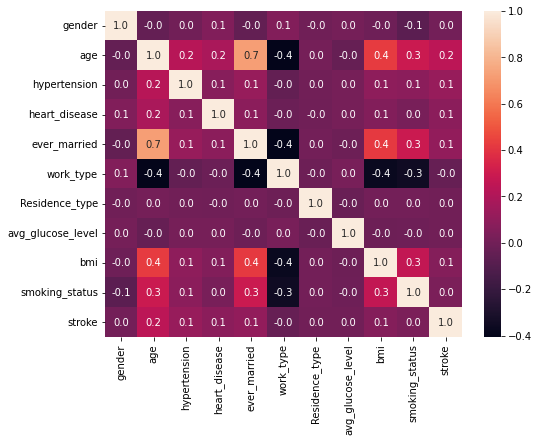

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True, fmt='.1f')

# X_train and y_train (first step)

In [ ]:
X_train = df_train.drop(columns=['stroke'])
y_train = df_train.stroke

# feature selection

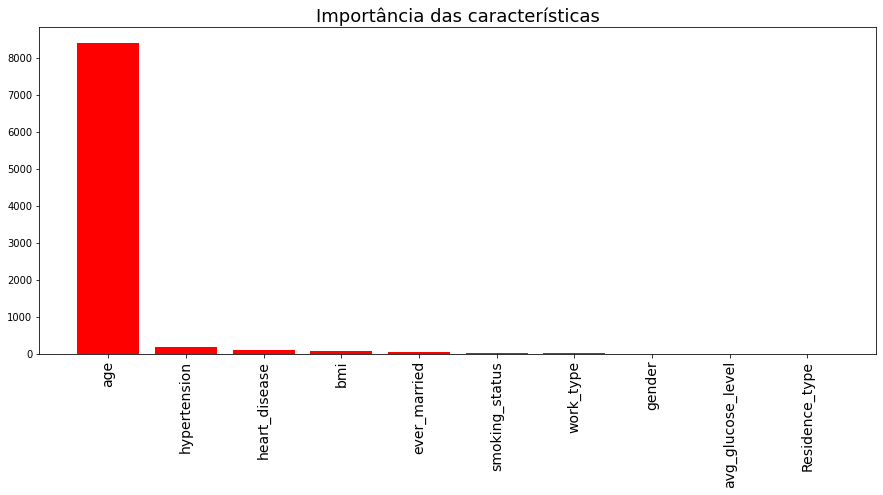

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
k_melhores = SelectKBest(score_func=chi2,k=X_train.shape[1])
kbest = k_melhores.fit_transform(X_train, y_train)
indices = np.argsort(k_melhores.scores_)[::-1]


features = []
for i in range(X_train.shape[1]):
    features.append(X_train.columns[indices[i]])
plt.figure(figsize=(15,6))
plt.bar(features, k_melhores.scores_[indices[range(X_train.shape[1])]], color='r', align='center')
plt.title('Importância das características',fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.show()

# Eliminando características de menor importância

In [ ]:
def eliminate_columns_by_importance(X_data, columns):
  X_data.drop(columns=columns, inplace=True)
  display(X_data)

In [ ]:
eliminate_columns_by_importance(X_train, ['gender','avg_glucose_level','Residence_type'])

,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status
id,,,,,,,
2228,23.00,0,0,0,2,38.0,0
4306,32.00,0,0,1,2,22.1,3
14351,40.00,0,0,1,2,32.9,0
3055,1.88,0,0,0,4,17.2,0
11813,38.00,0,0,1,2,32.7,2
...,...,...,...,...,...,...,...
13123,44.00,0,0,1,2,23.2,2
3264,18.00,0,0,0,2,24.7,0
9845,24.00,0,0,0,2,27.9,0


# Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def scaler_transform(X_train, columns):
  scaler = StandardScaler()
  X_train[columns] = scaler.fit_transform(X_train[columns])
  display(X_train)

In [ ]:
scaler_transform(X_train, ['age','bmi'])

,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status
id,,,,,,,
2228,-0.826115,0,0,0,2,1.696446,0
4306,-0.405790,0,0,1,2,-0.904467,3
14351,-0.032168,0,0,1,2,0.862191,0
3055,-1.812478,0,0,0,4,-1.706007,0
11813,-0.125573,0,0,1,2,0.829475,2
...,...,...,...,...,...,...,...
13123,0.154643,0,0,1,2,-0.724530,2
3264,-1.059629,0,0,0,2,-0.479161,0
9845,-0.779412,0,0,0,2,0.044294,0


# Balancing data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
def balancing_data(X_train, y_train, technique):
  balance = technique
  X_train_bal, y_train_bal = balance.fit_resample(X_train, y_train)

  return X_train_bal, y_train_bal

In [ ]:
rus = RandomUnderSampler(replacement=True)
smote = SMOTE()

In [ ]:
X_train_rus, y_train_rus = balancing_data(X_train, y_train, rus)

In [ ]:
X_train_smote, y_train_smote = balancing_data(X_train, y_train, smote)

# Validate data X and y and preprocessing

In [ ]:
encoder(df_validate,['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [ ]:
X_validate = df_validate.drop(columns=['stroke'])
y_validate = df_validate.stroke
scaler_transform(X_validate, ['age','bmi'])
eliminate_columns_by_importance(X_validate, ['gender','avg_glucose_level','Residence_type'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
628,0,1.685747,0,0,1,3,0,81.73,-1.067484,2
5341,0,-0.422696,0,0,1,2,1,80.28,2.177696,2
8355,1,-1.219219,0,0,0,2,1,72.99,0.181834,2
14772,1,-1.734616,0,0,0,4,0,60.70,-1.600729,0
11555,1,-1.781470,0,0,0,4,0,102.05,-1.874970,0
...,...,...,...,...,...,...,...,...,...,...
3759,1,-1.312927,0,0,0,2,0,83.43,0.760787,0
6739,1,-1.031801,0,0,0,2,1,80.08,-1.174133,2
10498,1,0.701807,0,0,1,2,0,94.12,0.730315,0


,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status
id,,,,,,,
628,1.685747,0,0,1,3,-1.067484,2
5341,-0.422696,0,0,1,2,2.177696,2
8355,-1.219219,0,0,0,2,0.181834,2
14772,-1.734616,0,0,0,4,-1.600729,0
11555,-1.781470,0,0,0,4,-1.874970,0
...,...,...,...,...,...,...,...
3759,-1.312927,0,0,0,2,0.760787,0
6739,-1.031801,0,0,0,2,-1.174133,2
10498,0.701807,0,0,1,2,0.730315,0


# Machine Learning

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

In [ ]:
models = []

In [ ]:
def machine_learning(nome, modelo, X_treino, y_treino, X_teste, y_teste):
  np.random.seed(100)
  modelos = []
  model  = modelo
  model.fit(X_treino, y_treino)
  y_pred = model.predict(X_teste)

  acuracia = accuracy_score(y_teste, y_pred,)
  roc_auc = roc_auc_score(y_teste, y_pred)
  recall = recall_score(y_teste, y_pred, average='macro')
  precision = precision_score(y_teste, y_pred, average='macro')
  f1 = f1_score(y_teste, y_pred, average='macro')
  print(f'Modelo utilizado: {modelo}')
  print(f'Acuracia: {round(acuracia*100,2)}%')
  print(f'ROC_AUC: {round(roc_auc*100,2)}%')
  print(f'Recall {round(recall*100,2)}%')
  print(f'Precision {round(precision*100,2)}%')
  print(f'F1-score: {round(f1*100,2)}%')
  print(classification_report(y_teste, y_pred))

  cm = confusion_matrix(y_teste, y_pred, labels=model.classes_)
  sns.heatmap(cm, annot=True, fmt='.1f')

  y_pred_proba = modelo.predict_proba(X_teste)[::,1]
  fpr, tpr, _ = roc_curve(y_teste, y_pred_proba)
  auc = roc_auc_score(y_teste, y_pred_proba)

  plt.figure(figsize=(7,5))
  plt.plot(fpr,tpr)
  plt.title(f'Curva ROC {nome}', fontsize=18)
  plt.xlabel('Taxa falsos positivos', fontsize=16)
  plt.ylabel('Taxa verdadeiros positivos', fontsize=16)
  plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
  plt.show()

  return [f'{nome}', modelo, round(acuracia*100,4), round(roc_auc*100,4), recall*100, precision*100, f1*100]

# Decision Tree

## Decision Tree Classifier Undersampling

In [ ]:
np.random.seed(100)

param_grid = {
    'max_depth': np.arange(1,10,1),
    'min_samples_leaf': np.arange(1,10,1),
    'min_samples_split': np.arange(2,10),
    'max_features': np.arange(1,X_train.shape[1])
    }
print(param_grid)
model  = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_train_rus, y_train_rus)
gs_pred = grid_search.predict(X_validate)

print()
print(grid_search.best_estimator_)

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([1, 2, 3, 4, 5, 6])}
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits

DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=8,
                       min_samples_split=8)


Modelo utilizado: DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=8,
                       min_samples_split=8)
Acuracia: 65.29%
ROC_AUC: 77.35%
Recall 77.35%
Precision 54.06%
F1-score: 46.99%
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      2213
           1       0.09      0.90      0.16        83

    accuracy                           0.65      2296
   macro avg       0.54      0.77      0.47      2296
weighted avg       0.96      0.65      0.76      2296



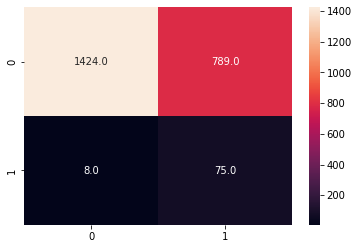

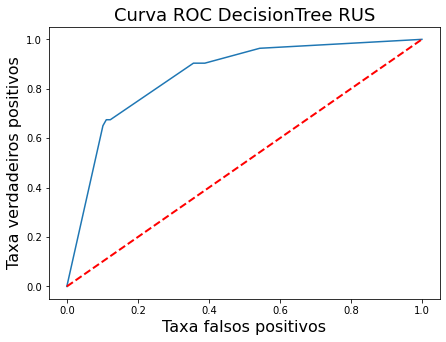

In [ ]:
dt_rus = machine_learning('DecisionTree RUS', 
DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=8,
                       min_samples_split=8), 
                 X_train_rus, y_train_rus, X_validate, y_validate)

## Decision Tree Classifier smote

In [ ]:
np.random.seed(100)

param_grid = {
    'max_depth': np.arange(1,10,1),
    'min_samples_leaf': np.arange(1,10,1),
    'min_samples_split': np.arange(2,10),
    'max_features': np.arange(1,X_train.shape[1])
    }
print(param_grid)
model  = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_train_smote, y_train_smote)
gs_pred = grid_search.predict(X_validate)

print()
print(grid_search.best_estimator_)

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([1, 2, 3, 4, 5, 6])}
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits

DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=5,
                       min_samples_split=7)


Modelo utilizado: DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=5,
                       min_samples_split=7)
Acuracia: 63.94%
ROC_AUC: 74.33%
Recall 74.33%
Precision 53.58%
F1-score: 45.89%
              precision    recall  f1-score   support

           0       0.99      0.63      0.77      2213
           1       0.08      0.86      0.15        83

    accuracy                           0.64      2296
   macro avg       0.54      0.74      0.46      2296
weighted avg       0.96      0.64      0.75      2296



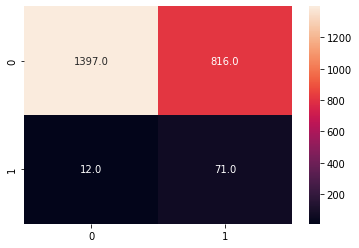

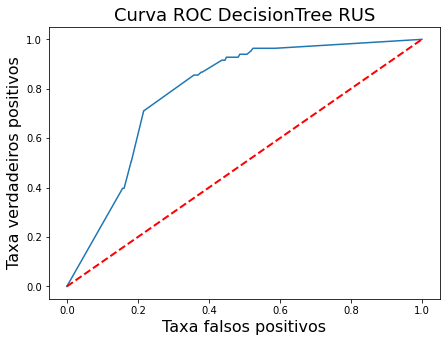

In [ ]:
dt_smote = machine_learning('DecisionTree RUS', DecisionTreeClassifier(max_depth=9, max_features=6, min_samples_leaf=5,
                       min_samples_split=7), 
                 X_train_smote, y_train_smote, X_validate, y_validate)

# AdaBoost Classifier Undersampling

In [ ]:
np.random.seed(100)

param_grid = {
    'learning_rate': np.arange(0.01,1,step=0.01),
    'n_estimators': np.arange(10,150, step =10)
    }
print(param_grid)
model  = AdaBoostClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_train_rus, y_train_rus)
gs_pred = grid_search.predict(X_validate)

print()
print(grid_search.best_estimator_)

{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]), 'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])}
Fitting 5 folds for each of 1386 candidates, totalling 6930 fits

AdaBoostClassifier(learning_rate=0.21000000000000002, n_estimators=70)


Modelo utilizado: AdaBoostClassifier(learning_rate=0.21000000000000002, n_estimators=70)
Acuracia: 66.86%
ROC_AUC: 78.17%
Recall 78.17%
Precision 54.26%
F1-score: 47.9%
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      2213
           1       0.09      0.90      0.16        83

    accuracy                           0.67      2296
   macro avg       0.54      0.78      0.48      2296
weighted avg       0.96      0.67      0.77      2296



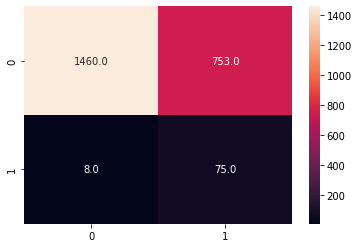

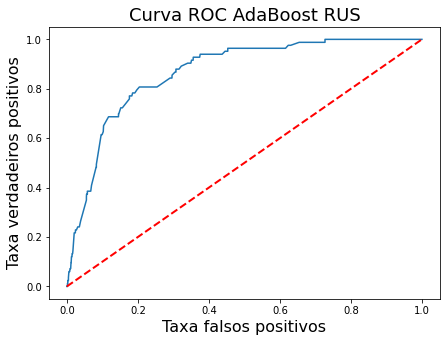

In [ ]:
ada_rus = machine_learning('AdaBoost RUS', AdaBoostClassifier(learning_rate=0.21000000000000002, n_estimators=70), 
                 X_train_rus, y_train_rus, X_validate, y_validate)

# AdaBoost Classifier Smote

In [ ]:
np.random.seed(100)

param_grid = {
    'learning_rate': np.arange(0.01,1,step=0.01),
    'n_estimators': np.arange(10,150, step =10)
    }
print(param_grid)
model  = AdaBoostClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_train_smote, y_train_smote)
gs_pred = grid_search.predict(X_validate)

print()
print(grid_search.best_estimator_)

{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]), 'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])}
Fitting 5 folds for each of 1386 candidates, totalling 6930 fits

AdaBoostClassifier(learning_rate=0.98, n_estimators=140)


Modelo utilizado: AdaBoostClassifier(learning_rate=0.98, n_estimators=140)
Acuracia: 72.26%
ROC_AUC: 77.49%
Recall 77.49%
Precision 54.55%
F1-score: 50.56%
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      2213
           1       0.10      0.83      0.18        83

    accuracy                           0.72      2296
   macro avg       0.55      0.77      0.51      2296
weighted avg       0.96      0.72      0.81      2296



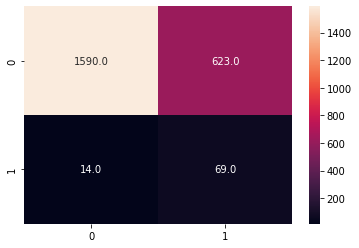

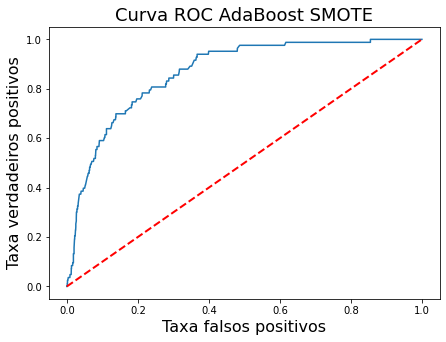

In [ ]:
ada_smote = machine_learning('AdaBoost SMOTE', 
AdaBoostClassifier(learning_rate=0.98, n_estimators=140), 
                 X_train_smote, y_train_smote, X_validate, y_validate)

# XGBoost Classifier Undersampling

In [ ]:
np.random.seed(100)

param_grid = {
    'learning_rate': np.arange(0.01,1,step=0.05),
    'n_estimators': np.arange(10,150, step =15),
    'max_depth': np.arange(1,8,1)
    }
print(param_grid)
model  = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_train_rus, y_train_rus)
gs_pred = grid_search.predict(X_validate)

print()
print(grid_search.best_estimator_)

{'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]), 'n_estimators': array([ 10,  25,  40,  55,  70,  85, 100, 115, 130, 145]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7])}
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits

XGBClassifier(learning_rate=0.11, max_depth=2, n_estimators=130)


Modelo utilizado: XGBClassifier(learning_rate=0.11, max_depth=2, n_estimators=130)
Acuracia: 69.08%
ROC_AUC: 78.16%
Recall 78.16%
Precision 54.39%
F1-score: 49.03%
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      2213
           1       0.09      0.88      0.17        83

    accuracy                           0.69      2296
   macro avg       0.54      0.78      0.49      2296
weighted avg       0.96      0.69      0.79      2296



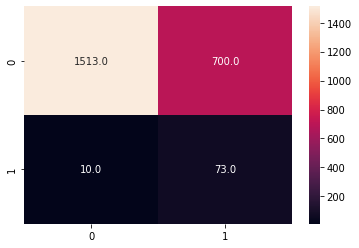

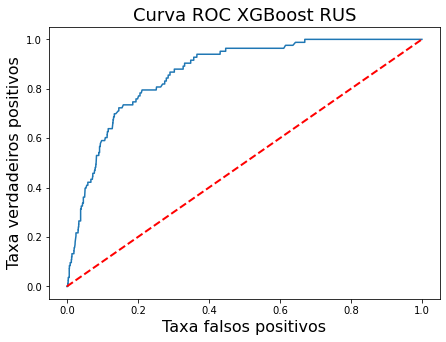

In [ ]:
xgb_rus = machine_learning('XGBoost RUS', xgb.
XGBClassifier(learning_rate=0.11, max_depth=2, n_estimators=130), 
                 X_train_rus, y_train_rus, X_validate, y_validate)

# XGBoost Classifier Smote

In [ ]:
np.random.seed(100)

param_grid = {
    'learning_rate': np.arange(0.01,1,step=0.05),
    'n_estimators': np.arange(10,150, step =15),
    'max_depth': np.arange(1,8,1)
    }
print(param_grid)
model  = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_train_smote, y_train_smote)
gs_pred = grid_search.predict(X_validate)

print()
print(grid_search.best_estimator_)

{'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]), 'n_estimators': array([ 10,  25,  40,  55,  70,  85, 100, 115, 130, 145]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7])}
Fitting 5 folds for each of 1400 candidates, totalling 7000 fits

XGBClassifier(learning_rate=0.31000000000000005, max_depth=7, n_estimators=130)


Modelo utilizado: XGBClassifier(learning_rate=0.31, max_depth=7, n_estimators=130)
Acuracia: 47.74%
ROC_AUC: 70.57%
Recall 70.57%
Precision 52.9%
F1-score: 37.26%
              precision    recall  f1-score   support

           0       1.00      0.46      0.63      2213
           1       0.06      0.95      0.12        83

    accuracy                           0.48      2296
   macro avg       0.53      0.71      0.37      2296
weighted avg       0.96      0.48      0.61      2296



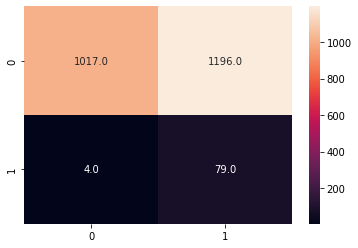

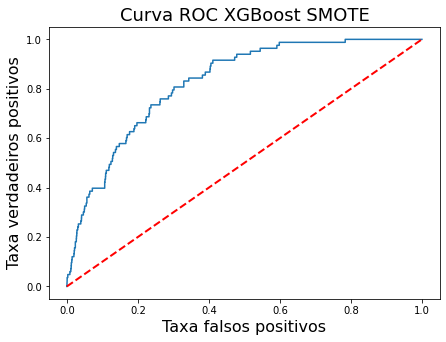

In [ ]:
xgb_smote = machine_learning('XGBoost SMOTE', xgb.
XGBClassifier(learning_rate=0.31, max_depth=7, n_estimators=130), 
                 X_train_smote, y_train_smote, X_validate, y_validate)

# Comparing models

In [ ]:
pd.DataFrame([dt_rus,dt_smote, ada_rus, ada_smote, xgb_rus, xgb_smote],
             columns=['Name','Model','Accuracy','ROC_AUC','Recall Macro','Precision Macro','F1-score Macro'])

,Name,Model,Accuracy,ROC_AUC,Recall Macro,Precision Macro,F1-score Macro
0,DecisionTree RUS,"DecisionTreeClassifier(max_depth=3, max_featur...",65.2875,77.3542,77.354243,54.060948,46.986962
1,DecisionTree RUS,"DecisionTreeClassifier(max_depth=9, max_featur...",63.9373,74.3346,74.334573,53.576421,45.889439
2,AdaBoost RUS,"(DecisionTreeClassifier(max_depth=1, random_st...",66.8554,78.1676,78.167619,54.256506,47.895846
3,AdaBoost SMOTE,"(DecisionTreeClassifier(max_depth=1, random_st...",72.2561,77.4904,77.490350,54.549140,50.558976
4,XGBoost RUS,"XGBClassifier(learning_rate=0.11, max_depth=2,...",69.0767,78.1603,78.160269,54.393563,49.025896
5,XGBoost SMOTE,"XGBClassifier(learning_rate=0.31, max_depth=7,...",47.7352,70.5682,70.568220,52.902153,37.264503


# Preprocessing new data

In [ ]:
print(df.shape)
df = remove_outliers(df, 'age')
print(df.shape)
print(df.shape)
df = remove_outliers(df, 'bmi')
print(df.shape)
print(df.shape)
df = remove_outliers(df, 'avg_glucose_level')
print(df.shape)

(15304, 11)
IQR for age is 31.0
(15304, 11)
(15304, 11)
IQR for bmi is 8.5
(15053, 11)
(15053, 11)
IQR for avg_glucose_level is 22.0
(14537, 11)


In [ ]:
encoder(df,['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [ ]:
X_train = df.drop(columns=['stroke'])
y_train = df.stroke

In [ ]:
eliminate_columns_by_importance(X_train, ['gender','avg_glucose_level','Residence_type'])

,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status
id,,,,,,,
0,28.0,0,0,1,2,31.1,2
1,33.0,0,0,1,2,23.9,1
2,42.0,0,0,1,2,40.3,0
3,56.0,0,0,1,2,28.8,2
4,24.0,0,0,0,2,28.8,2
...,...,...,...,...,...,...,...
15299,22.0,0,0,0,0,19.5,2
15300,46.0,1,0,1,2,32.1,2
15301,75.0,0,0,1,3,26.2,2


In [ ]:
scaler_transform(X_train, ['age','bmi'])

,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status
id,,,,,,,
0,-0.598671,0,0,1,2,0.566863,2
1,-0.365082,0,0,1,2,-0.612337,1
2,0.055378,0,0,1,2,2.073619,0
3,0.709427,0,0,1,2,0.190174,2
4,-0.785542,0,0,0,2,0.190174,2
...,...,...,...,...,...,...,...
15299,-0.878977,0,0,0,0,-1.332959,2
15300,0.242250,1,0,1,2,0.730641,2
15301,1.597065,0,0,1,3,-0.235648,2


In [ ]:
X_train_rus, y_train_rus = balancing_data(X_train, y_train, rus)

In [ ]:
X_train_smote, y_train_smote = balancing_data(X_train, y_train, smote)

# Test data

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle/Playground Season 4 EP 2/test.csv', index_col='id')
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...
25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown


In [ ]:
encoder(df_test,['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
eliminate_columns_by_importance(df_test, ['gender','avg_glucose_level','Residence_type'])
scaler_transform(df_test, ['age','bmi'])

,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status
id,,,,,,,
15304,57.0,0,0,1,2,33.4,0
15305,70.0,1,0,1,2,28.5,0
15306,5.0,0,0,0,4,19.5,0
15307,56.0,0,0,1,0,41.4,3
15308,32.0,0,0,1,2,30.1,3
...,...,...,...,...,...,...,...
25503,27.0,0,0,0,2,17.6,2
25504,49.0,0,0,1,2,26.7,0
25505,3.0,0,0,0,4,18.3,0


,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status
id,,,,,,,
15304,0.714762,0,0,1,2,0.765965,0
15305,1.330966,1,0,1,2,0.038264,0
15306,-1.750052,0,0,0,4,-1.298331,0
15307,0.667362,0,0,1,0,1.954048,3
15308,-0.470245,0,0,1,2,0.275880,3
...,...,...,...,...,...,...,...
25503,-0.707246,0,0,0,2,-1.580500,2
25504,0.335560,0,0,1,2,-0.229055,0
25505,-1.844853,0,0,0,4,-1.476543,0


In [ ]:
X_train.shape

(14537, 7)

# Using the best model

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.11, max_depth=2, n_estimators=130)
model.fit(X_train_rus, y_train_rus)
y_pred = model.predict(df_test)
y_pred_proba = model.predict_proba(df_test)[:,-1]
y_pred_proba

array([0.4835713 , 0.8956391 , 0.00880502, ..., 0.01096973, 0.03485667,
       0.01431842], dtype=float32)

# Submission

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Kaggle/Playground Season 4 EP 2/sample_submission.csv')
sample_submission['stroke'] = y_pred_proba
sample_submission

,id,stroke
0,15304,0.483571
1,15305,0.895639
2,15306,0.008805
3,15307,0.728643
4,15308,0.132568
...,...,...
10199,25503,0.011257
10200,25504,0.254547
10201,25505,0.010970
10202,25506,0.034857


In [ ]:
sample_submission.to_csv('stroke_submission.csv', index=False)